# Clase 9

...

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [24]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Mis variables de interés

In [25]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR','BPXSY1','BMXBMI', 'BMXLEG']
df = df[vars].dropna()
df

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXBMI,BMXLEG
0,1,1,62,128.0,27.8,43.3
1,1,1,53,146.0,30.8,38.0
2,1,1,78,138.0,28.8,35.6
3,2,2,56,132.0,42.4,38.5
4,2,2,42,100.0,20.3,37.4
...,...,...,...,...,...,...
5730,1,2,76,112.0,21.5,38.2
5731,2,1,26,118.0,33.8,43.4
5732,1,2,80,154.0,31.0,31.3
5733,1,1,35,104.0,26.0,40.3


### Correlación 

In [27]:
df[vars].corr()

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXBMI,BMXLEG
SMQ020,1.000000,0.180578,-0.147325,-0.093587,-0.027803,-0.080541
RIAGENDR,0.180578,1.000000,-0.017498,-0.104578,0.071564,-0.527342
RIDAGEYR,-0.147325,-0.017498,1.000000,0.466838,0.049514,-0.309734
BPXSY1,-0.093587,-0.104578,0.466838,1.000000,0.141162,-0.080850
BMXBMI,-0.027803,0.071564,0.049514,0.141162,1.000000,-0.062964
BMXLEG,-0.080541,-0.527342,-0.309734,-0.080850,-0.062964,1.000000


### Regresion Lineal 


In [28]:
model = sm.OLS.from_formula ('BPXSY1 ~ RIAGENDR',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.23
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           7.57e-14
Time:                        04:13:28   Log-Likelihood:                -21972.
No. Observations:                5087   AIC:                         4.395e+04
Df Residuals:                    5085   BIC:                         4.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.5527      0.812    160.689      0.000     128.960     132.145
RIAGENDR      -3.8245      0.510     -7.498      0.000      -4.824      -2.825
==============================================================================
Omnibus:                      915.922   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1840.824
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       5.006   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

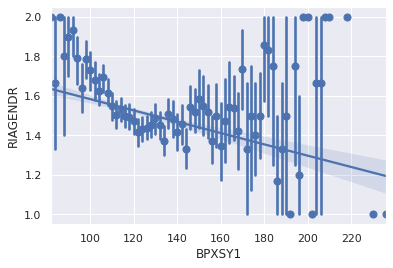

In [29]:
ax = sns.regplot (x = 'BPXSY1',
                  y = 'RIAGENDR',
                  data = df,
                 x_estimator = np.mean,
                 )

# Mas de una variable independiente

In [30]:
model = sm.OLS.from_formula ('BMXBMI ~ RIDAGEYR+ BPXSY1 + BMXLEG',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.69e-26
Time:                        04:14:13   Log-Likelihood:                -16941.
No. Observations:                5087   AIC:                         3.389e+04
Df Residuals:                    5083   BIC:                         3.392e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.0366      1.225     22.074      0.000      24.635      29.438
RIDAGEYR      -0.0162      0.006     -2.617      0.009      -0.028      -0.004
BPXSY1         0.0585      0.006      9.935      0.000       0.047       0.070
BMXLEG        -0.1128      0.026     -4.358      0.000      -0.164      -0.062
==============================================================================
Omnibus:                      782.011   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.756
Skew:                           0.993   Prob(JB):                    4.05e-300
Kurtosis:                       4.599   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### GRAFICA RESIDUAL PUNTOS TIENEN QUE ESTAR CERCA DE LINEA DE REGRESION

In [31]:
x = result.fittedvalues
y = result.resid

Text(0, 0.5, 'residuales')

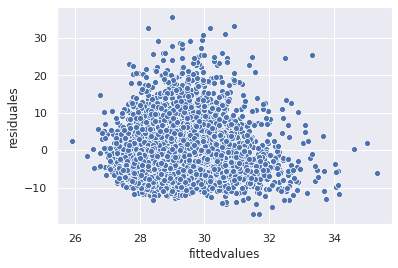

In [32]:
fig = sns.scatterplot ( x = x,
                       y = y,
                      )
fig.set_xlabel ('fittedvalues')
fig.set_ylabel ('residuales')